# Caso práctico: solución

Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web. El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web.

Lo primero que debemos hacer es entender bien qué es una **empresa de retail**. El sector de retail es el sector de la venta al detalle o minorista. Cualquier tipo de producto que se venda por unidades al consumidor final, es por definición un producto minorista. Por norma general, el **sector retail** representa la forma más común de comercio online. Un ejemplo de un tipo de negocio que es la clara definición del retail: los supermercados. Se trata de cadenas de negocios que se caracterizan por vender artículos de consumo masivo en grandes cantidades a muchos clientes. La creciente popularidad de las compras en línea ha llevado a la aparición de nuevas actividades económicas. Para tener éxito en el entorno altamente competitivo del comercio electrónico, es vital entender la intención del consumidor. Entender lo que motiva la intención del consumidor es crítico porque tal intención es clave para la supervivencia en este entorno de ritmo rápido e hipercompetitivo.

Una vez aclarado a qué hace referencia una empresa de estas características, pasemos al siguiente punto. Sabemos que la empresa ha ido recopilando datos con su herramienta de Google Analytics. Cuenta con datos de sesiones, cada una de ellas de un cliente distinto en un periodo de un año. Tenemos un csv donde se almacena cierta información en diferentes campos:

* El conjunto de datos consta de **diez** atributos numéricos y ocho categóricos (18 campos).
* El atributo **revenue**  (ingresos en español) puede ser usado como la ETIQUETA de la clase.
* **Administrative, administrative duration, informational, informational duration, product related y product related duration** representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra.
* Las características **bounce rate, exit rate y page value** representan las métricas medidas por Google Analytics para cada página del sitio de comercio electrónico. El valor de la característica bounce rate de una página web se refiere al porcentaje de visitantes que entran en el sitio desde esa página y luego salen (rebote) sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la característica exit rate para una página web específica se calcula como para todas las visitas a la página, el porcentaje que fueron las últimas en la sesión.
* La función **Page Value** representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico. 
* La característica de **special day** indica la cercanía de la hora de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, San Valentín) en el que es más probable que las sesiones finalicen con una transacción. El valor de este atributo se determina teniendo en cuenta la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para San Valentín, este valor toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero.

* El conjunto de datos también incluye el sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante como visitante que regresa o como nuevo visitante, un valor booleano que indica si la fecha de la visita es de fin de semana, y el mes del año.


Veamos los datos para entender mejor cada una de estas variables.

In [1]:
#librerias
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objs as go
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import cross_val_score
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
warnings.filterwarnings("ignore")

In [2]:
retail = pd.read_csv("online_shoppers_intention.csv", 
                     sep=",")
retail.head(5)

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [3]:
retail.shape

(12330, 18)

<hr>
SIGNIFICADO MÁS CONCISO DE CADA COLUMNA:

* Administrative: este es el número de páginas de este tipo (administrativas) que visitó el usuario.
* Administrative_Duration: Esta es la cantidad de tiempo dedicado a esta categoría de páginas.
* Informational: Este es el número de páginas de este tipo (informativas) que visitó el usuario.
* Informational_Duration: Esta es la cantidad de tiempo dedicado a esta categoría de páginas.
* ProductRelated: Este es el número de páginas de este tipo (relacionadas con el producto) que visitó el usuario.
* ProductRelated_Duration: Esta es la cantidad de tiempo dedicado a esta categoría de páginas.
* BounceRates: El porcentaje de visitantes que ingresan al sitio web a través de esa página y salen sin desencadenar ninguna tarea adicional.
* ExitRates: El porcentaje de páginas vistas en el sitio web que terminan en esa página específica.
* PageValues: El valor promedio de la página promediado sobre el valor de la página de destino y/o la finalización de un comercio electrónico.
* SpecialDay: Este valor representa la proximidad de la fecha de navegación a días especiales o días festivos (por ejemplo, el Día de la Madre o el Día de San Valentín) 
* Month: Contiene el mes en que se produjo la página vista, en forma de cadena
* OperatingSystems: Un valor entero que representa el sistema operativo en el que estaba el usuario cuando vio la página.
* Browser: Un valor entero que representa el navegador que el usuario estaba usando para ver la página.
* Region: Un valor entero que representa en qué región se encuentra el usuario.
* TrafficType: Un valor entero que representa en qué tipo de tráfico se clasifica el usuario.
* VisitorType: Una cadena que representa si un visitante es un visitante nuevo, un visitante recurrente u otro.
* Weekend: Un valor booleano que representa si la sesión es un fin de semana.
* Revenue: Un valor booleano que representa si el usuario completó o no la compra.

El conjunto de datos se obtiene de Google Analytics, que recopila información sobre el rendimiento de los sitios web y también todas las actividades realizadas en el sitio web por los clientes. El conjunto de datos tiene 12.330 sesiones únicas durante un período anual que se puede utilizar para predecir el comportamiento de los clientes en el sitio web. El conjunto de datos tiene parámetros de google analytics que se pueden utilizar para predecir los ingresos generados por los clientes.

<hr>

# **Cuestión 1**: Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio.
<hr>

A continuación, vamos a realizar un análisis de los datos para entender su papel en este dataset. Ver su aspecto, sus variables independientes, la variable target, la relación entre ambas, etc. Digamos que sería como una primera cita donde queremos saber todo sobre nuestro acompañante.


In [4]:
print('Las variables del dataframe presentan el siguiente tipo de datos:\n')
retail.dtypes

Las variables del dataframe presentan el siguiente tipo de datos:



Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

# Análisis univariable.
## ¿Qué variables son numéricas y qué variables son categóricas? ¿Cuál es su distribución?

Este estudio será interesante tenerlo en cuenta para entender cómo se distribuyen cada una de las variables que entran en juego en nuestro análisis.

In [5]:
numeric_features = retail.select_dtypes(include = [np.number])
print("Lista de las columnas de tipo numérico:", numeric_features.columns.to_list())

Lista de las columnas de tipo numérico: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


Dentro de las variables numéricas debemos diferenciar entre continuas y discretas. La diferencia entre una variable discreta y una variable continua es el número de valores que pueden tomar. Una variable continua puede tomar cualquier valor, en cambio, una variable discreta no acepta cualquier valor sino que solo puede tomar un número contable de valores. <br>

In [6]:
retail.describe()

Administrative  Administrative_Duration  Informational  \
count    12316.000000             12316.000000   12316.000000   
mean         2.317798                80.906176       0.503979   
std          3.322754               176.860432       1.270701   
min          0.000000                -1.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 8.000000       0.000000   
75%          4.000000                93.500000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12316.000000    12316.000000             12316.000000   
mean                34.506387       31.763884              1196.037057   
std                140.825479       44.490339              1914.372511   
min                 -1.000000        0.000000                -1.000000   
25%                  0.000000        7.000000               185.000000   
50%                  0.000000       18.000000               599.766190   
75%                  0.000000       38.000000              1466.479902   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12316.000000  12316.000000  12330.000000  12330.000000   
mean       0.022152      0.043003      5.889258      0.061427   
std        0.048427      0.048527     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003119      0.025124      0.000000      0.000000   
75%        0.016684      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

Siguiendo la tabla anterior y atendiendo a los valores máximos que alcanza, intuitivamente, podemos discernir las distintas variables numéricas.

* **Continuas**: Administrative_Duration, Informational_Duration, Product Related, Product Related_Duration, BounceRates, ExitRates, PageValues.<br>
* **Discretas**: Administrative, Informational,Special Day, OperatingSystems, Browser, Region. <br>

In [7]:
lista_numeric_cont_features = ['Administrative','Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','BounceRates','ExitRates','PageValues']
lista_numeric_dis_features = ['Informational','SpecialDay','OperatingSystems','Region','Browser','TrafficType']

### Variables numéricas continuas.
Echemos un vistazo a su distribución:

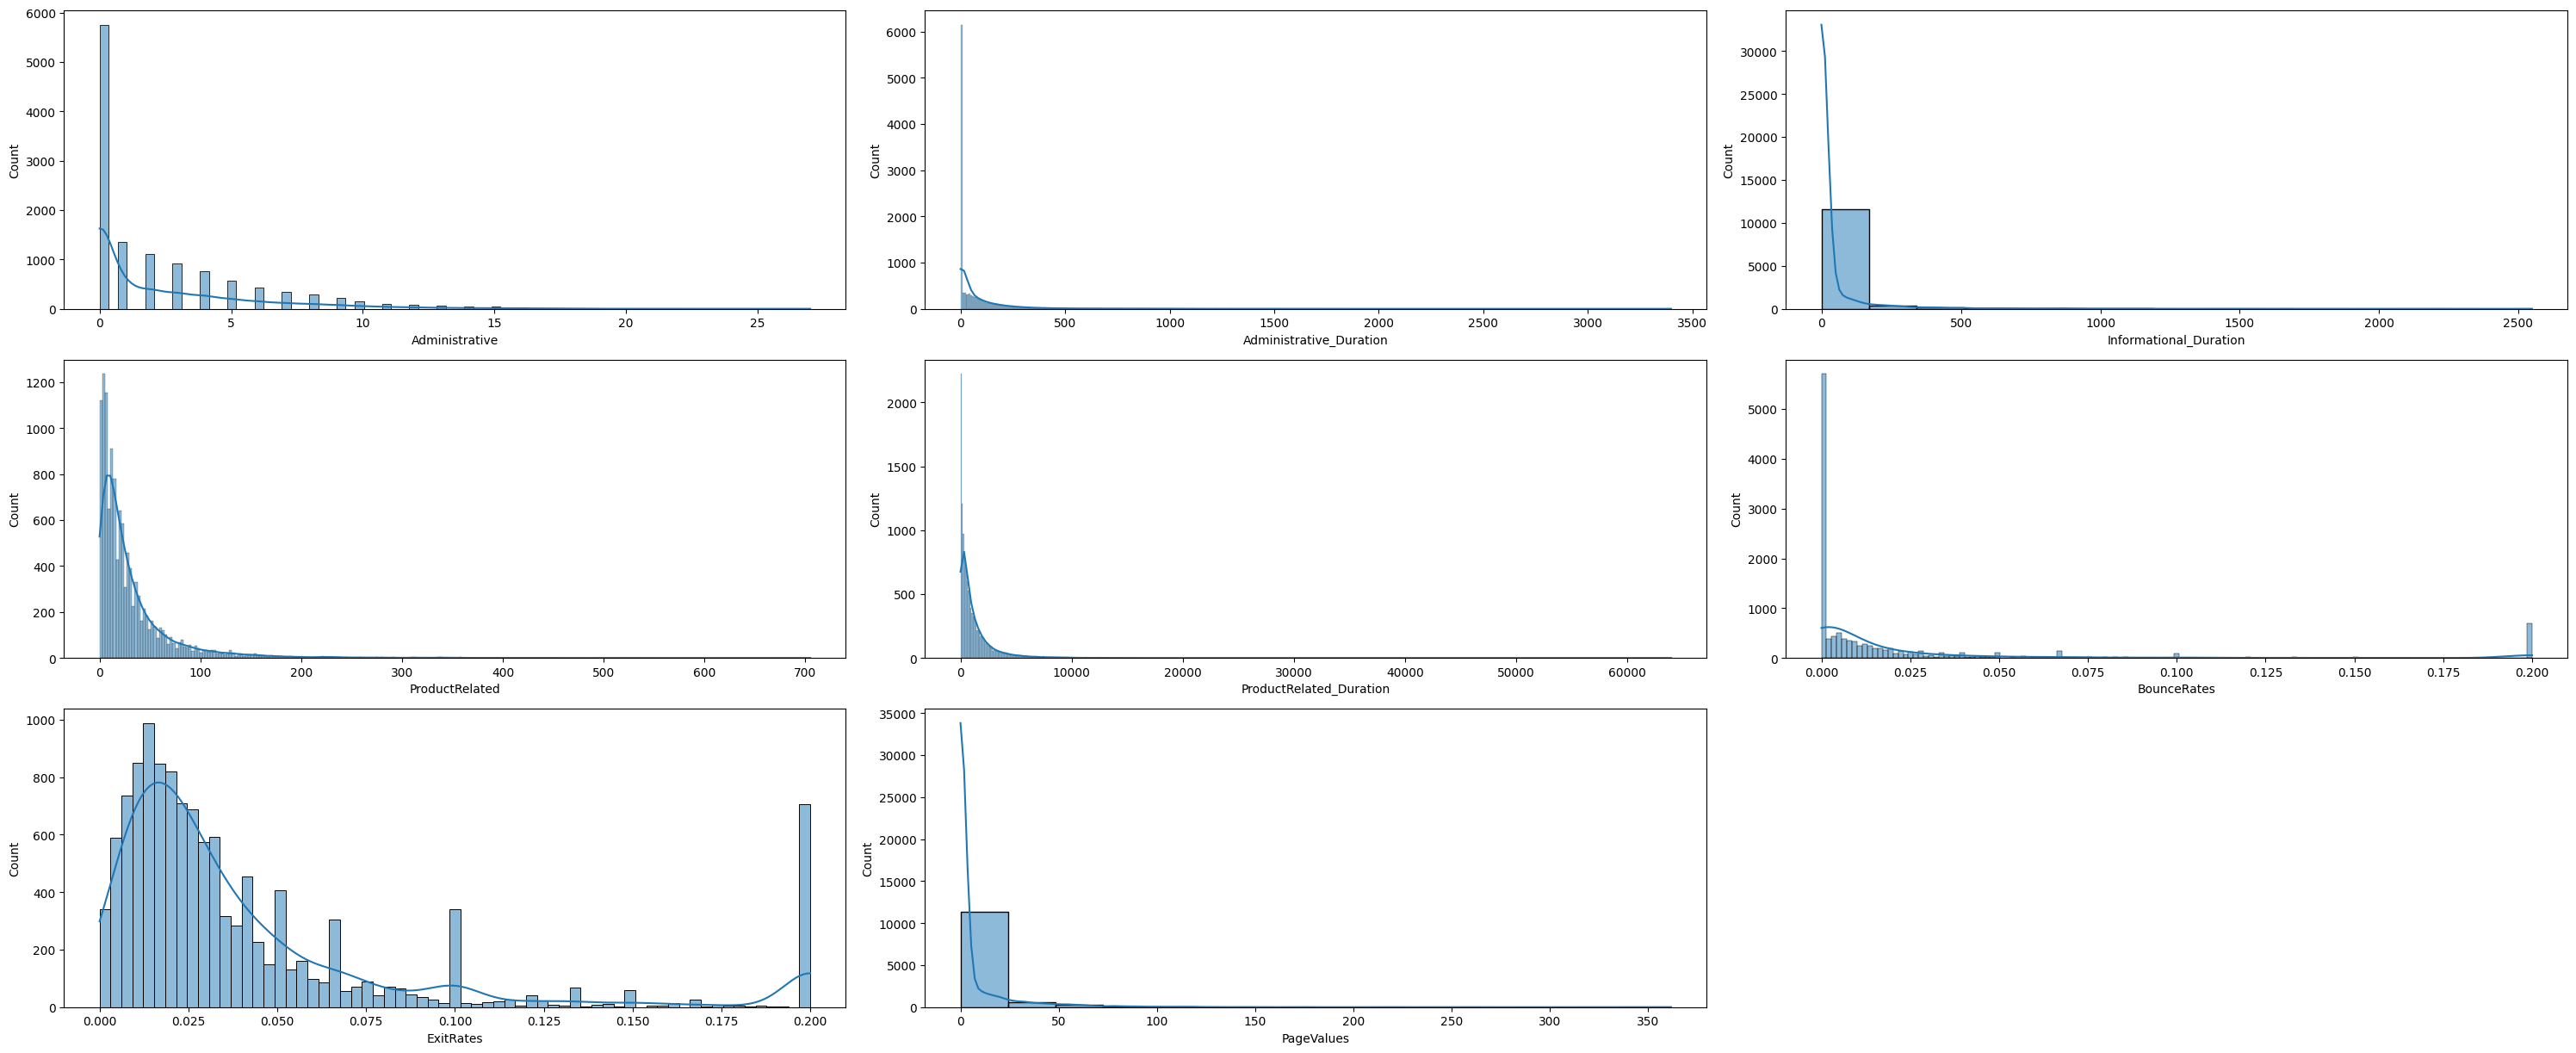

In [8]:
fig = plt.figure(figsize=(30,20))
for index,col in enumerate(lista_numeric_cont_features):
    plt.subplot(5,3,index+1)
    sns.histplot(numeric_features.loc[:,col].dropna(), kde=True)
fig.tight_layout(pad=1.0)

Observamos que muchas características numéricas están sesgadas a la derecha con colas largas. Esto es común en la configuración de comercio electrónico, por lo que algunos usuarios tienen estadísticas de uso extremadamente altas. BounceRates y PageValues no siguen una distribución normal. Todas ellas presentan muchos valores atípicos en general.
La tasa de salida tiene valores más altos que la tasa de rebote, lo que tiene sentido, donde las páginas de confirmación de transacciones, por ejemplo, harán que la tasa de salida promedio aumente.

### Variables numéricas discretas.

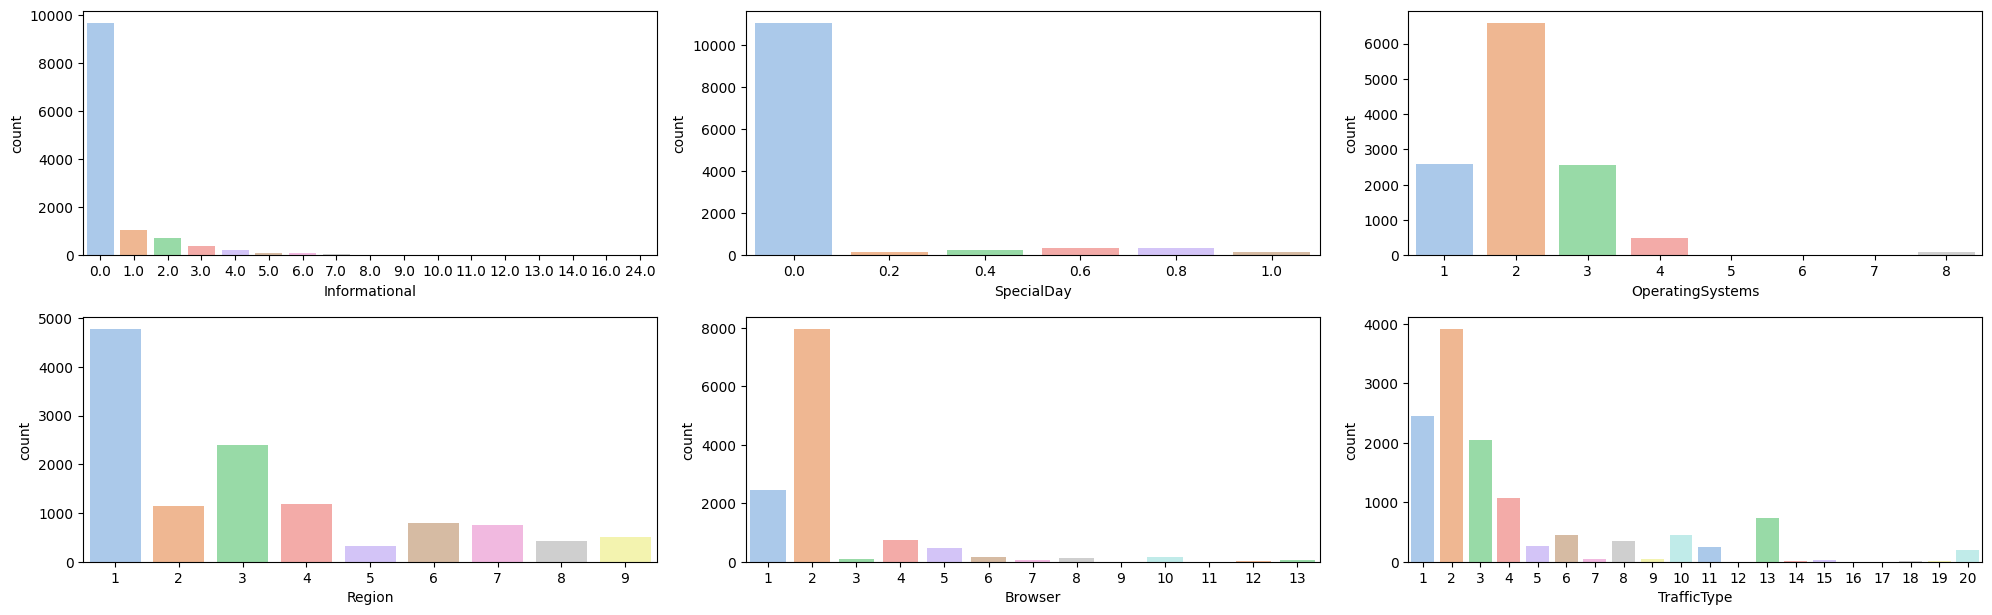

In [9]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(lista_numeric_dis_features):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_features.dropna(),palette = 'pastel')
fig.tight_layout(pad=1.0)

Veamos más en profundidad algunas de estas variables.

**¿De qué regiones proceden nuestros clientes?**

In [10]:
retail['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [11]:
c1=[1,3,4,2,6,7,9,8,5]
c2=[4780,2403,1182,1136,805,761,511,434,318]

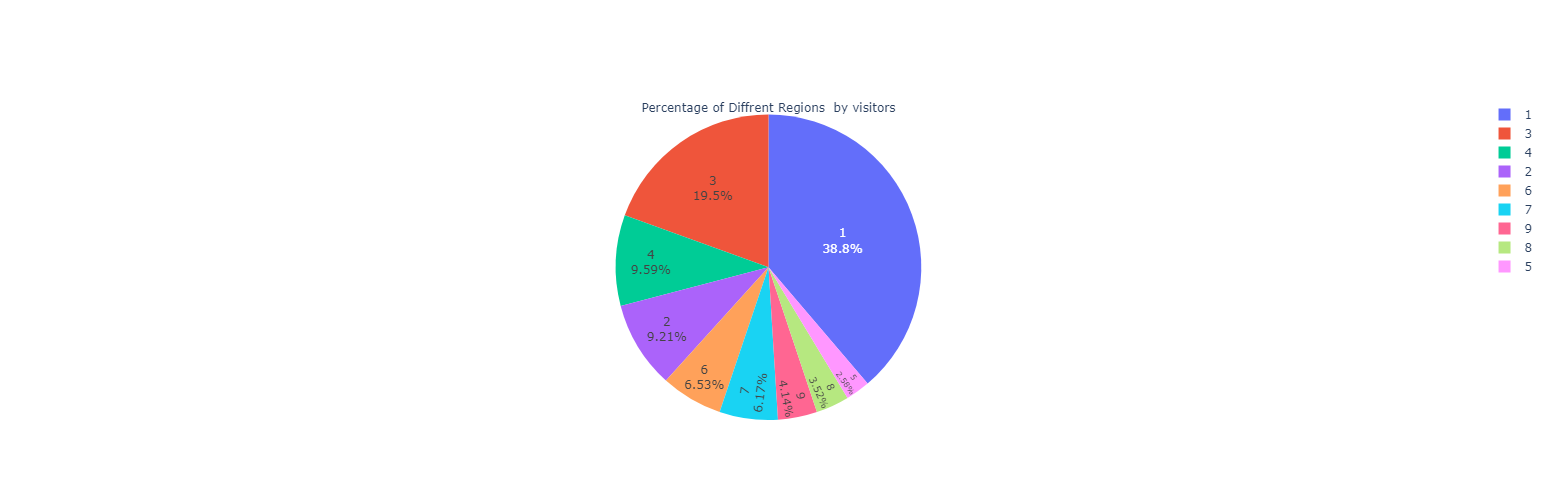

In [12]:
fig = go.Figure(data=[go.Pie(labels=c1,
                             values=c2,title='Percentage of Diffrent Regions  by visitors')],layout=go.Layout(height=500, width=800))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Se deduce que la mayor parte de los visitantes proceden de la región 1 (38.8%). La preceden la región 3 (19.5%) y la región 4 (9.59%) sucesivamente. El resto basta observar la gráfica.

**¿Con qué sistemas operativos entran a nuestra página web los clientes?**

In [13]:
retail['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [14]:
c1 = [2,1,3,4,8,6,7,5]
c2 = [6601,2585,2555,478,79,19,7,6]

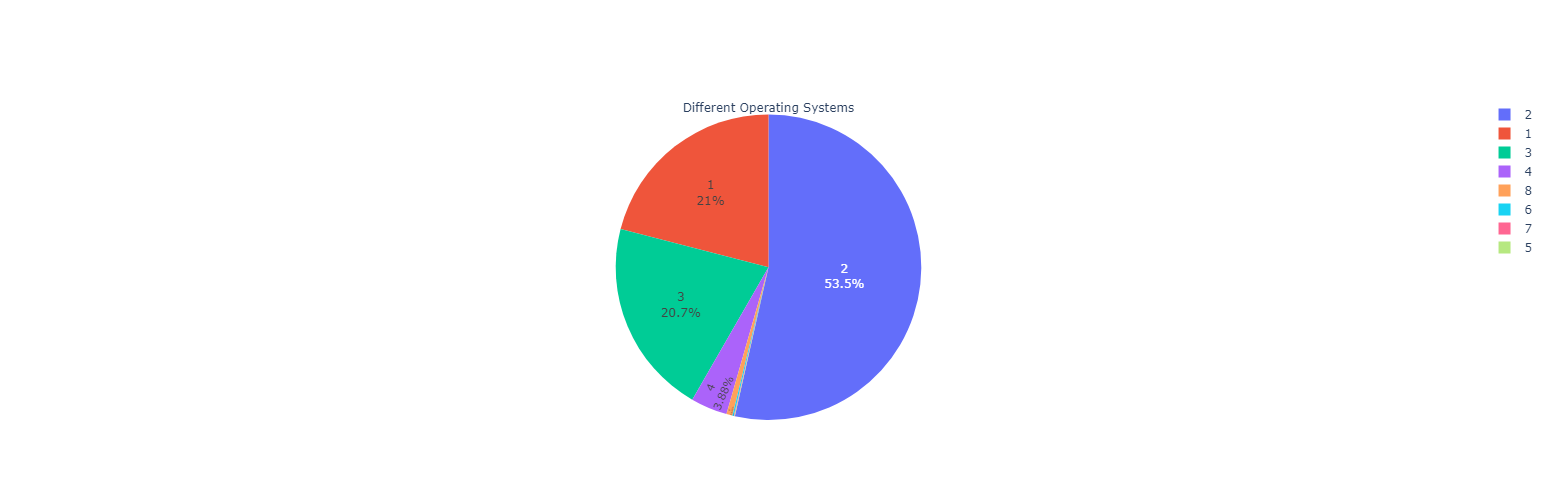

In [15]:
fig = go.Figure(data=[go.Pie(labels=c1,
                             values=c2,title='Different Operating Systems')],layout=go.Layout(height=500, width=800))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

El 53.54% de los usuarios que han entrado en la página lo han hecho desde el sistema operativo 1 (más de la mitad), el 20.97% desde el sistema operativo 2, el 20.72% desde el sistema operativo 3 y finalmente el 4.78% desde los restantes sistemas operativos. 

## Variables categóricas.
Vamos a diferenciar, por un lado, las variables categóricas que son de tipo objeto y por otro, las de tipo booleano.

In [16]:
#variables categóricas
categorical_features = retail.select_dtypes(exclude = [np.number])
categorical_features.columns
#variables categóricas de tipo objeto.
categorical_features_object = ['Month', 'VisitorType']

### Variables categóricas de tipo objeto.

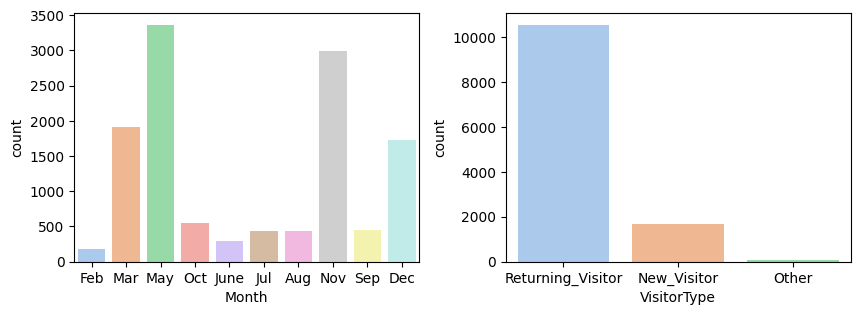

In [17]:
#variables categóricas de tipo objeto.
fig = plt.figure(figsize=(13,15))

for index,col in enumerate(categorical_features_object):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=categorical_features.dropna(), palette = 'pastel' )
fig.tight_layout(pad=1.0)

**¿Qué meses visitan los clientes la página web?**

In [18]:
retail['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

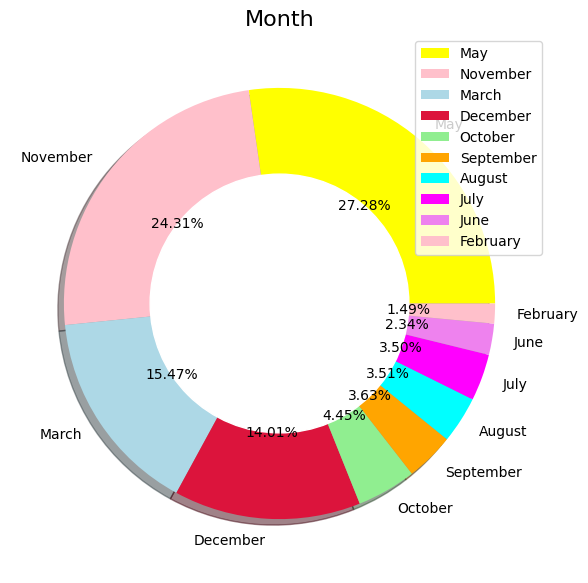

In [19]:
# creating a donut chart for the months variations
# plotting a pie chart for share of special days
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Month', fontsize = 16)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

La página web ha sido visitada con mayor frecuencia en los meses de mayo (27.28%), noviembre (24.31%), marzo (15.47%) y diciembre (14.01%) con bastante diferencia respecto a los restantes meses. Esto se puede atribuir principalmente a que en dichos meses del año existen fechas señaladas como el día de la madre en mayo, el día del padre en marzo y las navidades en los meses de noviembre y diciembre donde se realizan compras navideñas para regalos a amigos y familiares. Cabe destacar que hay meses que no han sido monitorizados por la empresa o simplemente no ha habido usuarios que hayan accedido a la página web, lo cual sinceramente me extraña.

**¿Qué porcentaje de usuarios predomina (nuevos o aquellos que vuelven)?**

In [20]:
retail['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

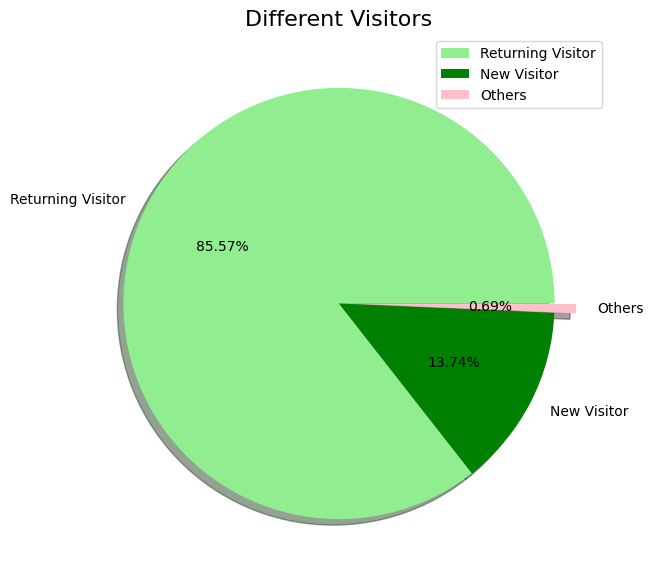

In [21]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 16)
plt.axis('off')
plt.legend()
plt.show()

El 87.57% de los usuarios que acceden a la página web regresan (esto es muy interesante para campañas de marketing), el 13.74% son visitantes nuevos y el 0.69% son de otro tipo. Se muestra que la mayoría de los clientes, ya sea que generen ingresos o no, son clientes que regresan, lo que sugiere que la empresa ha lidiado con una buena retención de clientes.

### Variables categóricas de tipo booleano.

**¿Cuál es la tasa de ingresos de los clientes que inician sesión en nuestra web?**

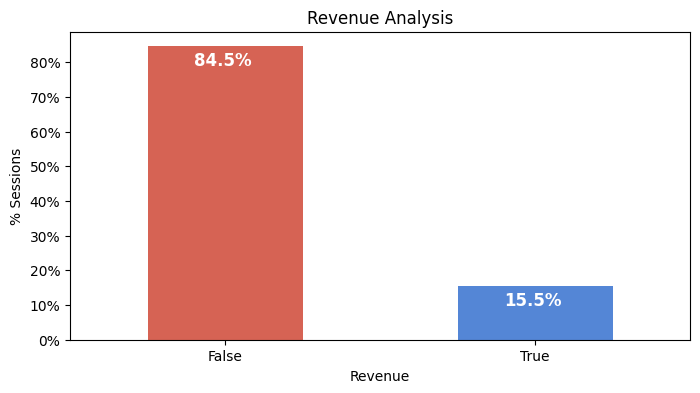

In [22]:
plt.figure(figsize = (8,4))
colors = ['#d66354','#5486d6']

ax1 = (retail['Revenue'].value_counts()*100.0 /len(retail)).plot(kind='bar', stacked = True,
                    rot = 0,color=colors)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel('% Sessions')
ax1.set_xlabel('Revenue')
ax1.set_title('Revenue Analysis')
totals = []

for i in ax1.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax1.patches:
    ax1.text(i.get_x()+.15, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

El gráfico de barras de arriba muestra la comparación entre dos estados de Ingresos que es la variable objetivo.
Se puede ver que el 84,4% de las sesiones resulta en ningún ingreso y el 15,6% de las sesiones resulta en ingresos por lo que es un conjunto de datos desequilibrado 
donde solo el 15.6% de las sesiones terminaron en una compra. Un 15.6% no es extremadamente desequilibrado, todavía podemos explorar métodos o algoritmos que son mejores para tratar con un conjunto de datos desequilibrado.

**¿El hecho de ser fin de semana influye en que el cliente decida entrar en nuestra web?**

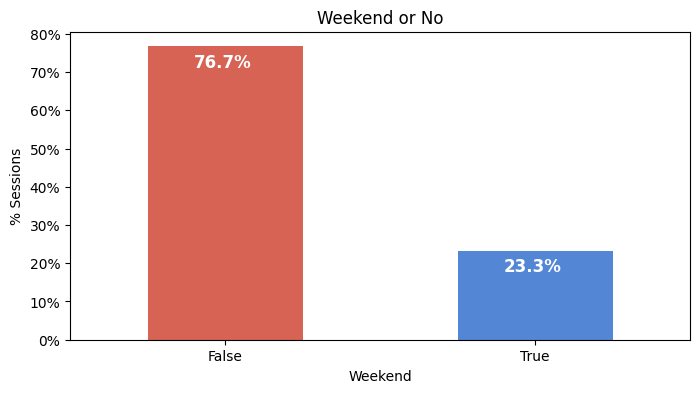

In [23]:
plt.figure(figsize = (8,4))
colors = ['#d66354','#5486d6']

ax1 = (retail['Weekend'].value_counts()*100.0 /len(retail)).plot(kind='bar', stacked = True,
                    rot = 0,color=colors)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel('% Sessions')
ax1.set_xlabel('Weekend')
ax1.set_title('Weekend or No')
totals = []

for i in ax1.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax1.patches:
    ax1.text(i.get_x()+.15, i.get_height()-5.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

El gráfico de barras de arriba muestra si las sesiones ocurren en fin de semana o no.
A partir de la trama, se puede ver que el 76,7% de las sesiones no sucede en fin de semana y el 23,4% de las sesiones sucede en fin de semana.

# Análisis bivariable.

Veamos la relación que hay entre las diferentes variables que entran en juego. Para ello, nos ayudaremos de la matriz de correlaciones.

<AxesSubplot: >

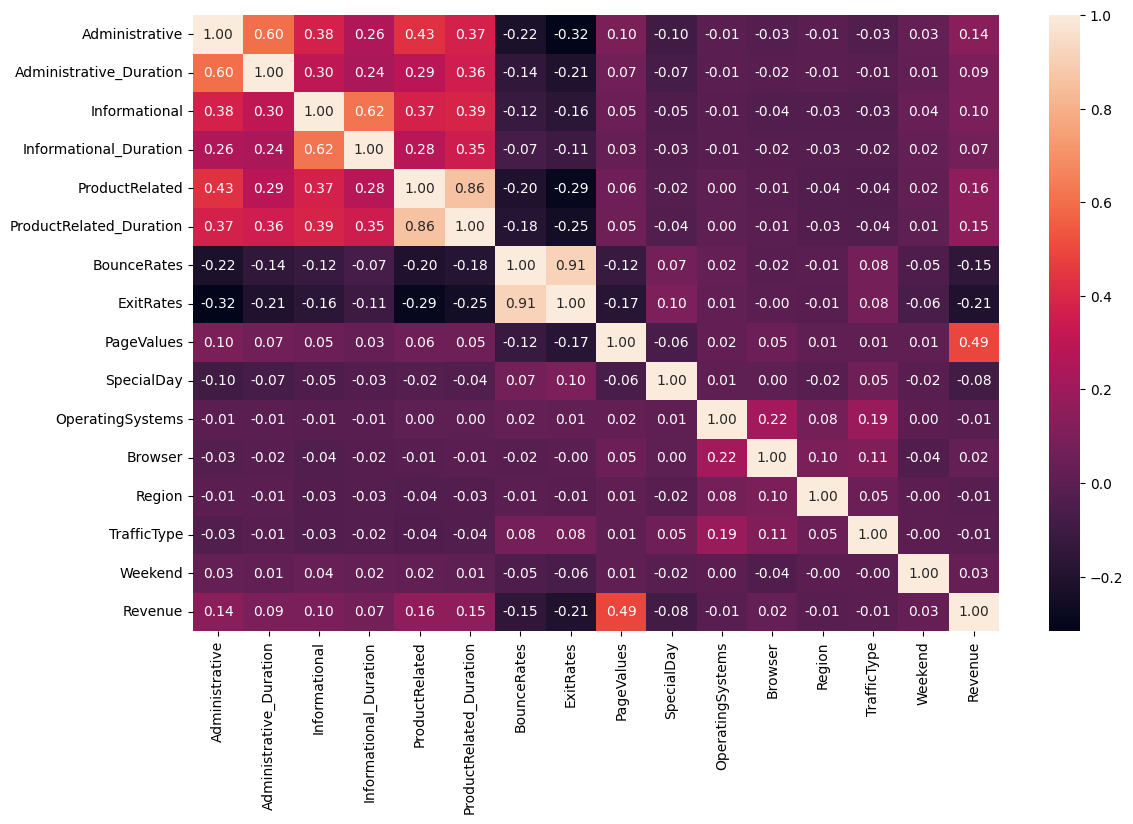

In [24]:
Var_Corr = retail.corr()
fig, ax = plt.subplots(figsize=(13,8))  
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True,fmt=".2f")

Se deduce que las variables:
* ExitRates y BounceRates están fuertemente correlacionadas.
* Informational y Informational_Duration fuertemente correlacionadas.
* Administrative y Administrative_Duration fuertemente correlacionadas.
* RageValues y Revenue están correlacionadas.

Una de interés es ExitRates, que se correlaciona negativamente con PageValues. ExitRates se define como la tasa de salida promedio de las páginas visitadas por el usuario. ExitRates también se correlaciona positivamente con BounceRates. Este hallazgo encaja bien en nuestra hipótesis de 'usuario comprometido': las sesiones con altos ExitRates o BounceRates indican un usuario menos comprometido, lo que resulta en menos conversiones de compra.<br>
Vemos que un valor de vista de página más alto y una duración de navegación más larga se correlacionan positivamente con PageValues. Esto es intuitivo, ya que una vista de página más alta y una duración de navegación más larga indicarían un alto nivel de engagement del usuario. Por ejemplo, si un usuario ya tenía un artículo en mente, podría pasar más tiempo en un sitio web de comercio electrónico para comparar los precios de los comentarios de productos similares. Un usuario altamente comprometido tendrá más probabilidades de comprar que un usuario pasivo.

En cuanto a nuestra variable etiqueta, veamos cuáles son las features que más influyen en ella.

In [25]:
numeric_train = retail.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['Revenue']].sort_values(['Revenue'], ascending=False)

Revenue
Revenue                  1.000000
PageValues               0.492569
ProductRelated           0.158280
ProductRelated_Duration  0.152130
Administrative           0.138631
Informational            0.095085
Administrative_Duration  0.093395
Informational_Duration   0.070250
Weekend                  0.029295
Browser                  0.023984
TrafficType             -0.005113
Region                  -0.011595
OperatingSystems        -0.014668
SpecialDay              -0.082305
BounceRates             -0.150621
ExitRates               -0.206886

**Page Values, Exit Rates, Product Related, Product Related Duration, Bounce Rates y Administrative** están más correlacionados con el tipo de ingresos **Related**. Sin embargo, Special Day, Weekend y TrafficType son las que menos relación tienen.

**¿Cuál es la probabilidad de compra en función del tiempo que un cliente realice gestiones administrativas y de información sobre un producto en la web?**

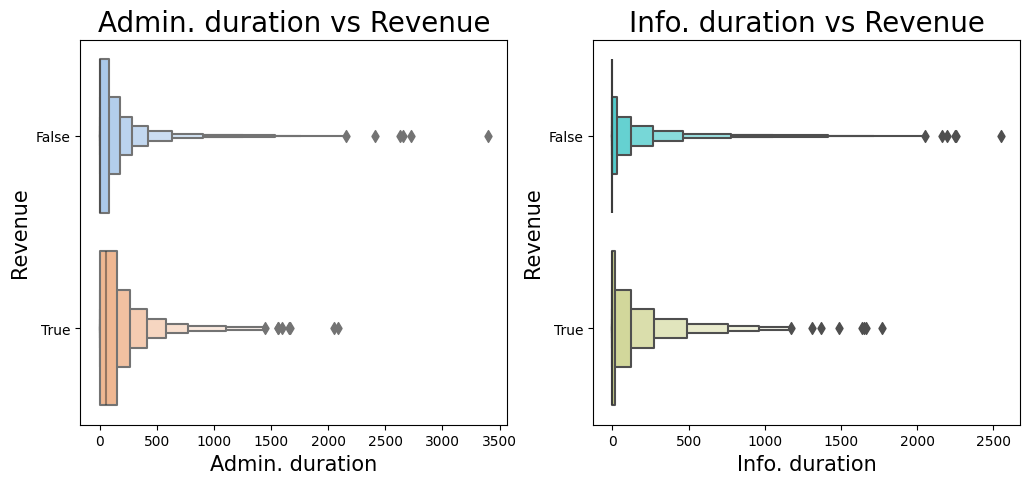

In [26]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.subplot(1, 2, 1)
sns.boxenplot(x =retail['Administrative_Duration'], y=retail['Revenue'], palette = 'pastel', orient='h')
plt.title('Admin. duration vs Revenue', fontsize = 20)
plt.xlabel('Admin. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.subplot(1, 2, 2)
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x=retail['Informational_Duration'], y=retail['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Info. duration vs Revenue', fontsize = 20)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.subplots_adjust(right=1.3) 
plt.show()

Vimos  ya en el análisis univariable que Administrative_Duration e Information_Duration se distribuyen exponencialmente. <br>
También observamos que hay algunos valores atípicos que luego deberemos eliminar para que nuestro modelo funcione correctamente. <br>
La probabilidad de compra es mayor cuanto menor es el tiempo que se pasa en la sección de dudas administrativas en la página web. Análogo este razonamiento para la sección de infomación.
Si lo pensamos, tiene bastante lógica. Nosotros cuando entramos en una web y tenemos que hacer alguna gestión del tipo que sea, ya hace que nuestra idea de comprar cierto producto se pueda desvanecer. Sin embargo, cuando entramos a tiro fijo, es decir, con la idea de comprar, solo queremos ver productos y dejar a un lado las gestiones. Además, cuando más tiempo pasamos viendo información del producto significa que tenemos más dudas sobre si comprarlo o no.

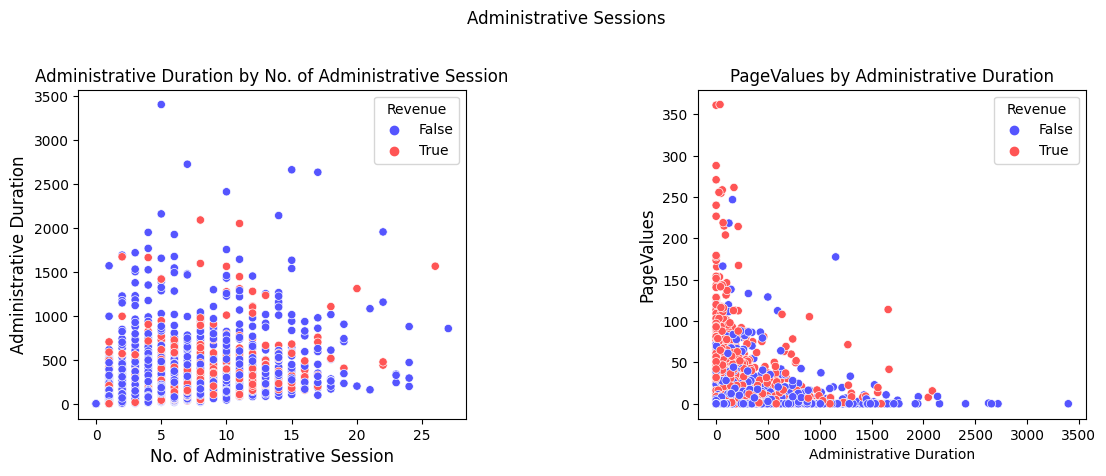

In [27]:
plt.figure(figsize = (13,10))

ax1 = plt.subplot(221)
ax1 = sns.scatterplot(x="Administrative", y="Administrative_Duration", data=retail, palette="seismic", hue = "Revenue")
ax1.set_xlabel("No. of Administrative Session", fontsize=12)
ax1.set_ylabel("Administrative Duration", fontsize=12)
ax1.set_title("Administrative Duration by No. of Administrative Session")

ax2 = plt.subplot(222)
ax2 = sns.scatterplot(x="Administrative_Duration", y="PageValues", data=retail, palette="seismic", hue = "Revenue")
ax2.set_xlabel("Administrative Duration")
ax2.set_ylabel("PageValues", fontsize=12)
ax2.set_title("PageValues by Administrative Duration")

plt.suptitle('Administrative Sessions')
plt.subplots_adjust(wspace = 0.6, hspace = 0.4, top = 0.9)

La duración de las sesiones administrativas está por debajo de 1500 de media. El número de sesiones está comprendido entre 0 y 25.

La gráfica de la derecha presenta una distribución exponencial. A menor duración de las dudas administrativas, mayor es el valor de PageValues.

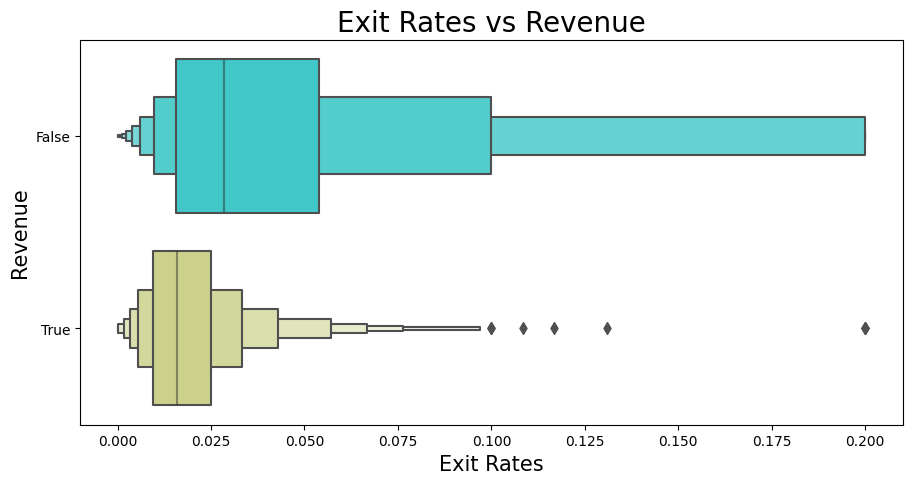

In [28]:
plt.rcParams['figure.figsize'] = (7, 5)

sns.boxenplot(x=retail['ExitRates'], y=retail['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Exit Rates vs Revenue', fontsize = 20)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.subplots_adjust(right=1.3) 
plt.show()

Se observa que la variable ExitRates presenta una distribución normal gaussiana tanto para los valores verdaderos como falsos.

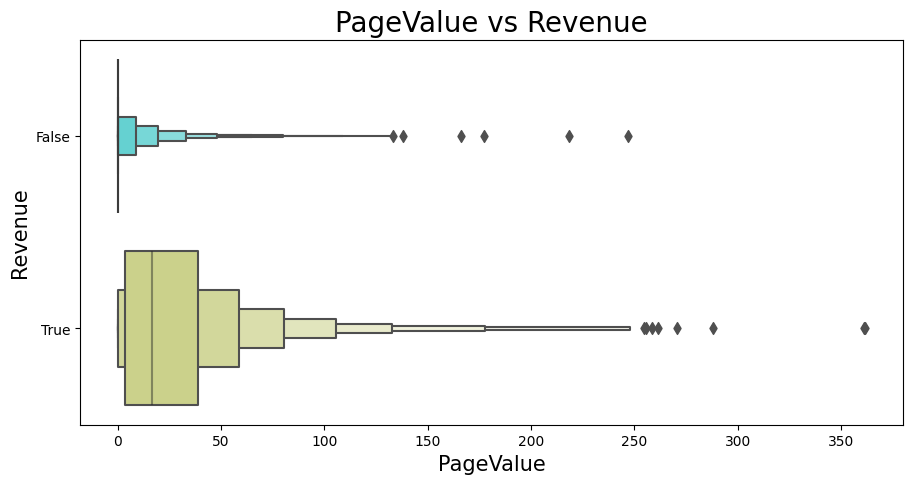

In [29]:
plt.rcParams['figure.figsize'] = (7, 5)

sns.boxenplot(x=retail['PageValues'], y=retail['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('PageValue vs Revenue', fontsize = 20)
plt.xlabel('PageValue', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.subplots_adjust(right=1.3) 
plt.show()

PageValues se define como el valor medio de página de las páginas visitadas por el usuario. En un contexto de comercio electrónico, los valores se asignan normalmente a páginas importantes como páginas de pago o páginas que preceden al proceso de pago. Como se ve en la figura 2, tener un PageValues superior a 50 aumenta la probabilidad de conversión de compra. Por lo tanto, esta función PageValues proporciona una señal fuerte sobre si el usuario realizará una compra o no.

Text(0.5, 1.0, 'ExitRates vs BounceRates')

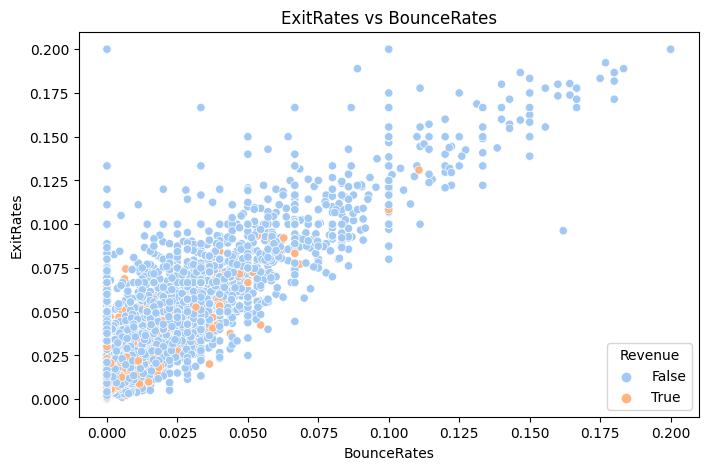

In [30]:
plt.figure(figsize = (8,5))
ax = sns.scatterplot(x="BounceRates", y="ExitRates",hue = 'Revenue',palette = "pastel", data=retail)
ax.set_title('ExitRates vs BounceRates')

Existe una relación lineal positiva entre las tasas de salida y las tasas de rebote. Como se aprecia en la gráfica, las altas tasas de rebote y salida no generan ingresos.

**¿Cómo afecta la duración más larga en el sitio web a la tasa de rebote?**

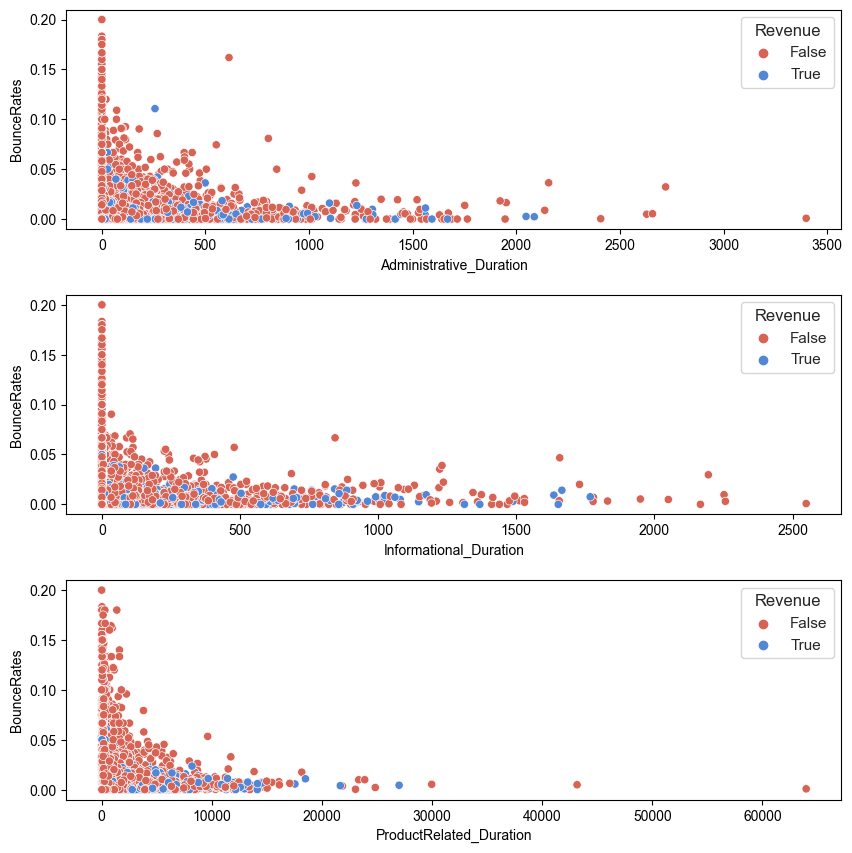

In [31]:
fig, ax = plt.subplots(3,figsize=(10,10))

sns.set(style="ticks")

ax1 = sns.scatterplot(x="Administrative_Duration", y="BounceRates",hue="Revenue",palette = ['#d66354','#5486d6'],  data=retail, ax=ax[0])
ax2 = sns.scatterplot(x="Informational_Duration", y="BounceRates",hue="Revenue",palette = ['#d66354','#5486d6'], data=retail, ax=ax[1])
ax3 = sns.scatterplot(x="ProductRelated_Duration", y="BounceRates",hue="Revenue",palette = ['#d66354','#5486d6'],  data=retail, ax=ax[2])

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

Los gráficos anteriores muestran el efecto de la duración de la página web en las tasas de rebote. Se aprecia que a mayor duración en el sitio web (tanto para gestiones administrativas como sobre el producto), menor es la tasa de rebote. Se observa que existe una **distribución exponencial**.

**¿Cómo diferenciaríamos a clientes series de aquellos que no lo son?**

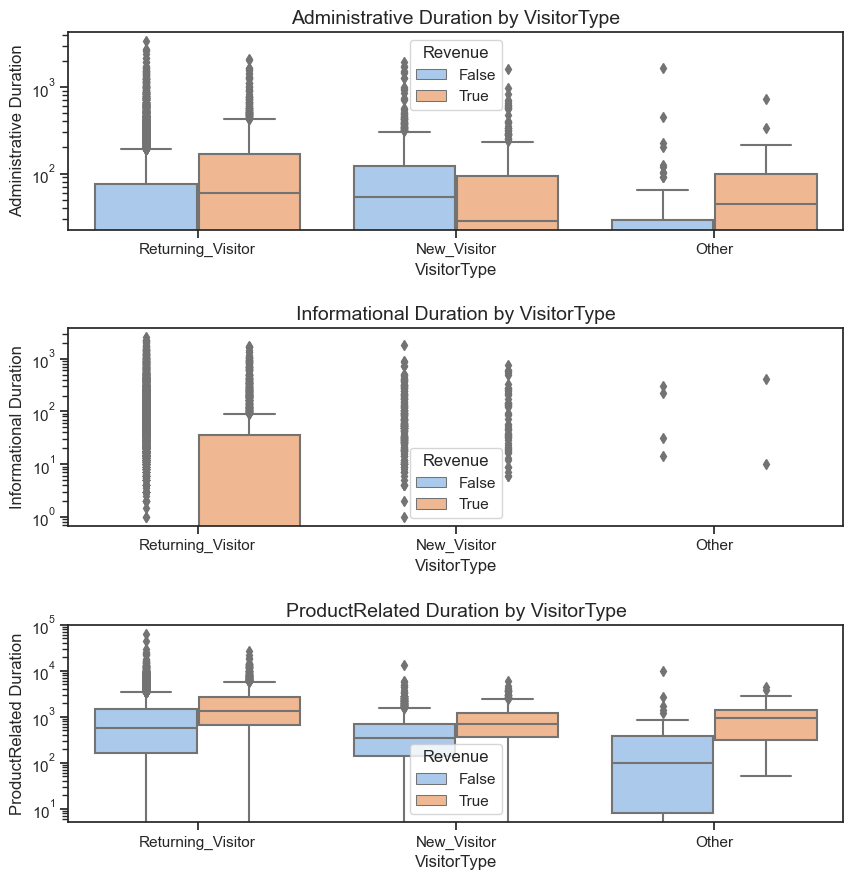

In [32]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
ax1 = sns.boxplot(x="VisitorType",y="Administrative_Duration", data=retail,hue='Revenue',palette='pastel', ax = axes[0])
ax1.set_xlabel("VisitorType", fontsize=12)
ax1.set_ylabel("Administrative Duration", fontsize=12)
ax1.set_title("Administrative Duration by VisitorType", fontsize=14)
ax1.set_yscale('log')

ax2 = sns.boxplot(x="VisitorType",y="Informational_Duration", data=retail,hue='Revenue',palette='pastel', ax = axes[1])
ax2.set_xlabel("VisitorType", fontsize=12)
ax2.set_ylabel("Informational Duration", fontsize=12)
ax2.set_title("Informational Duration by VisitorType", fontsize=14)
ax2.set_yscale('log')

ax3 = sns.boxplot(x="VisitorType",y="ProductRelated_Duration", data=retail,hue='Revenue',palette='pastel', ax = axes[2])
ax3.set_xlabel("VisitorType", fontsize=12)
ax3.set_ylabel("ProductRelated Duration", fontsize=12)
ax3.set_title("ProductRelated Duration by VisitorType", fontsize=14)
ax3.set_yscale('log')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5, top = 0.9)

El gráfico anterior muestra los tipos de visitantes que pasaron cierto tiempo en diferentes sitios web y el estado de los ingresos (compraron o no).
Los clientes que regresan muestran una mayor probabilidad de comprar un producto y son clientes que podríamos categorizar como serios.
También aquellos que pasaron más tiempo en la página relacionada con el producto muestran mayor probabilidad de compra. En contraste, los clientes que son visitantes nuevos muestran una menor probabilidad de compra. Como se observa, los clientes no pasan mucho tiempo en la página informativa, pero sí lo hacen en las páginas relacionadas con el producto. Solo los clientes que regresan pasan tiempo en la página informativa y compra el producto.

**¿Cómo afecta la tasa de salida a los ingresos?**

Text(0.5, 1.0, 'Revenue by Exit Rates')

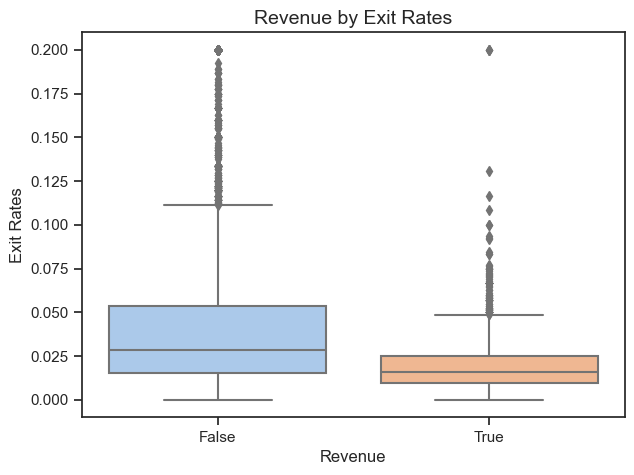

In [33]:
ax1 = sns.boxplot(x="Revenue",y="ExitRates", data=retail,palette='pastel')
ax1.set_xlabel("Revenue", fontsize=12)
ax1.set_ylabel("Exit Rates", fontsize=12)
ax1.set_title("Revenue by Exit Rates", fontsize=14)

Cuando las tasas de salida son bajas alrededor de 0.025, hay una mayor probabilidad de que el cliente compre un producto. En cambio, las tasas de salida superiores a 0,03 no generan ingresos.

**¿Cuál es el efecto del tipo de tráfico en los ingresos?**

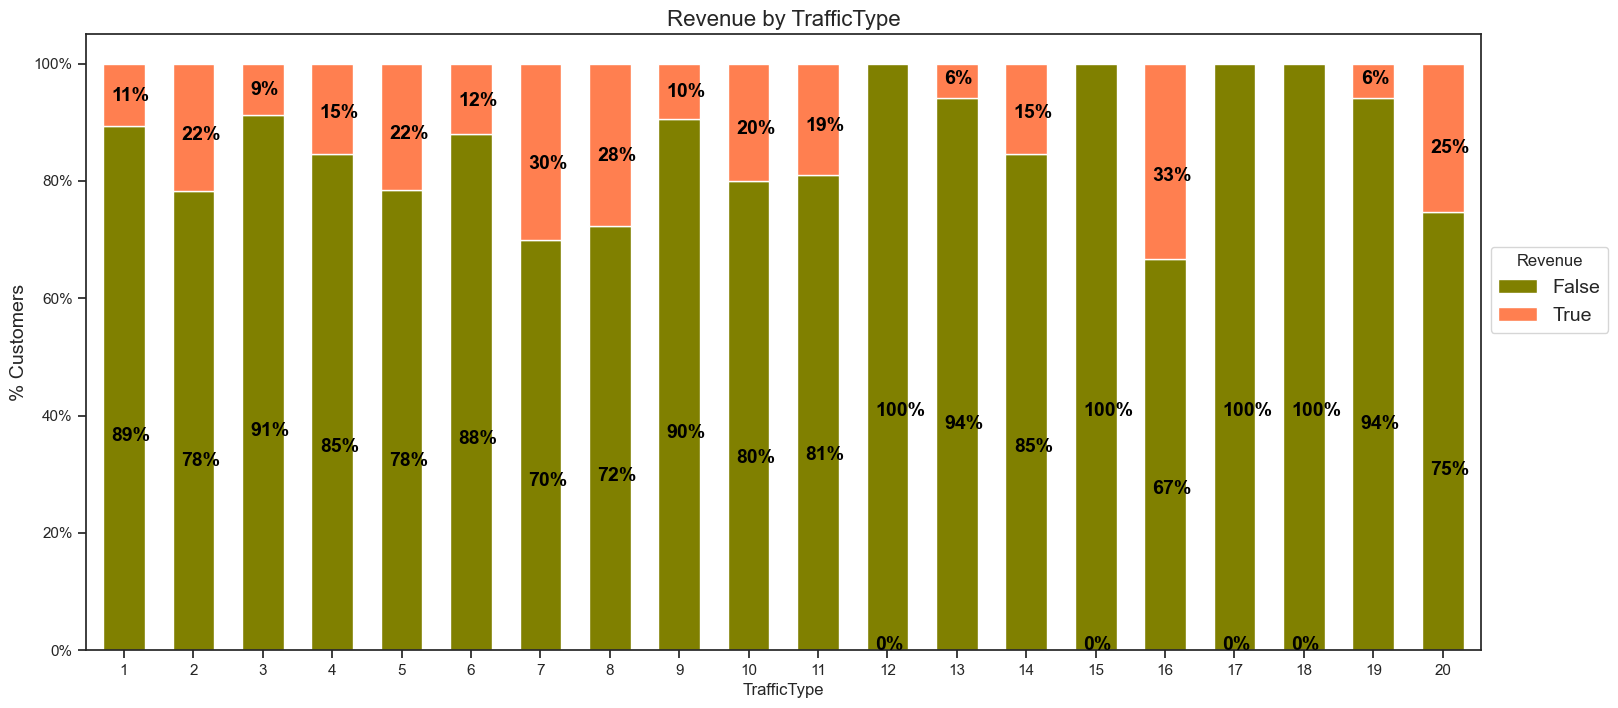

In [34]:
import matplotlib.ticker as mtick
traffic_revenue = retail.groupby(['TrafficType','Revenue']).size().unstack()

ax = (traffic_revenue.T*100.0 / traffic_revenue.T.sum()).T.plot(kind='bar',
                                                                width = 0.6,
                                                                stacked = True,
                                                                rot = 0,color = ['olive','coral'] ,
                                                                figsize = (18,8))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(bbox_to_anchor=(1, 0.5),loc='lower left',prop={'size':14},title = 'Revenue')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Revenue by TrafficType',size = 16)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.20*width, p.get_y()+.4*height),
                color = 'black',
               weight = 'bold',size =14)

El tipo de tráfico 12, 15, 17 y 18 no muestra ingresos.
El tipo de tráfico 16 muestra el porcentaje más alto de clientes que resulta en ingresos, 33% en comparación con otros tipos de tráfico.

# Análisis multivariable
## Month Vs Page value Vs Revenue

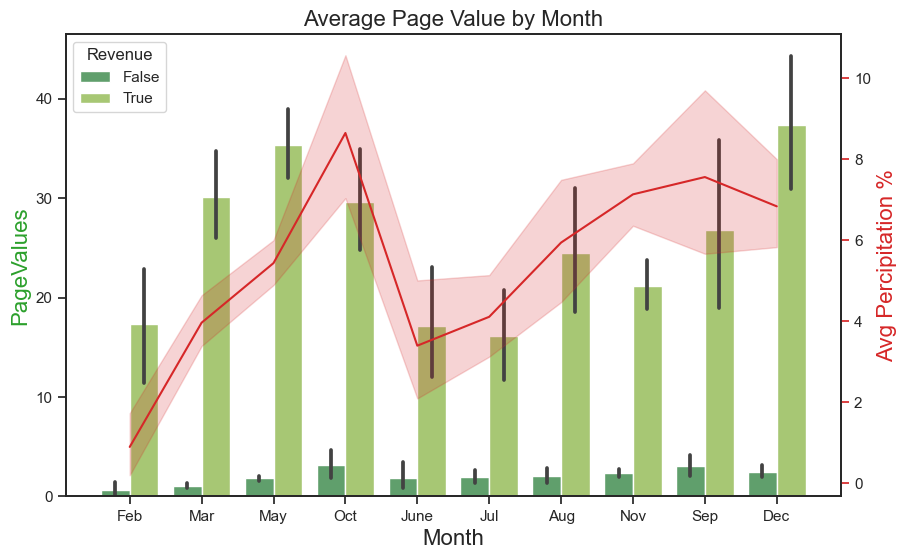

In [35]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Average Page Value by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 = sns.barplot(x='Month', y='PageValues', data = retail, palette='summer',hue='Revenue')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.lineplot(x='Month', y='PageValues', data = retail, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

El valor de la página ha aumentado considerablemente a lo largo de los meses con cierta caída a mediados del año.
El valor de la página es alto cuando hay un ingreso.
Hay una alta variación en los datos de valor de página teniendo en cuenta cada mes. Sería beneficioso la introducción de promociones de temporada con ofertas y eventos atractivos, involucrando más conversiones y asegurando que los clientes leales tengan un papel beneficioso en traer nuevas conversiones

## EJERCICIO 2: Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings, habrá que eliminarlos con el método de Pandas llamado Dropna().a.

Veamos si nuestro dataset presenta valores faltantes:
## Null Values

<AxesSubplot: >

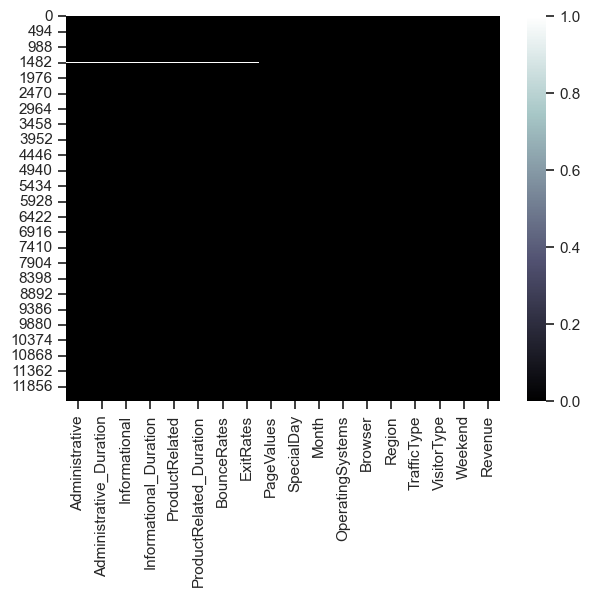

In [36]:
sns.heatmap(retail.isnull(), cmap='bone')

In [37]:
total = retail.isnull().sum().sort_values(ascending=False)
percent = (retail.isnull().sum()/retail.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Administrative              14  0.001135
Informational               14  0.001135
Informational_Duration      14  0.001135
ProductRelated              14  0.001135
ProductRelated_Duration     14  0.001135
BounceRates                 14  0.001135
ExitRates                   14  0.001135
Administrative_Duration     14  0.001135
Region                       0  0.000000
Weekend                      0  0.000000
VisitorType                  0  0.000000
TrafficType                  0  0.000000
SpecialDay                   0  0.000000
Browser                      0  0.000000
OperatingSystems             0  0.000000
Month                        0  0.000000
PageValues                   0  0.000000
Revenue                      0  0.000000

Eliminamos los valores faltantes. Como son pocos, esto no afectará a nuestro futuro modelo.

In [38]:
retail = retail.dropna()
total = retail.isnull().sum().sort_values(ascending=False)
total

Administrative             0
Administrative_Duration    0
Weekend                    0
VisitorType                0
TrafficType                0
Region                     0
Browser                    0
OperatingSystems           0
Month                      0
SpecialDay                 0
PageValues                 0
ExitRates                  0
BounceRates                0
ProductRelated_Duration    0
ProductRelated             0
Informational_Duration     0
Informational              0
Revenue                    0
dtype: int64

## Outliers
Eliminar valores atípicos evitará que el rendimiento de nuestros modelos se vea afectado por valores extremos. De nuestro boxplot anterior, hemos identificado las siguientes características con valores extremos:

In [39]:
# identify outliers with standard deviation
out_per=[]
for i in numeric_features.columns:
    data_mean, data_std = mean(retail[i]), std(retail[i])
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in retail[i] if x < lower or x > upper]
    
    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in retail[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

Administrative : 

Identified outliers: 213
Non-outlier observations: 12103
Percent of outliers: 1.7294576161091264 

Administrative_Duration : 

Identified outliers: 232
Non-outlier observations: 12084
Percent of outliers: 1.8837284832737902 

Informational : 

Identified outliers: 260
Non-outlier observations: 12056
Percent of outliers: 2.111075024358558 

Informational_Duration : 

Identified outliers: 230
Non-outlier observations: 12086
Percent of outliers: 1.8674894446248782 

ProductRelated : 

Identified outliers: 236
Non-outlier observations: 12080
Percent of outliers: 1.9162065605716143 

ProductRelated_Duration : 

Identified outliers: 219
Non-outlier observations: 12097
Percent of outliers: 1.778174732055862 

BounceRates : 

Identified outliers: 705
Non-outlier observations: 11611
Percent of outliers: 5.724261123741474 

ExitRates : 

Identified outliers: 709
Non-outlier observations: 11607
Percent of outliers: 5.756739201039299 

PageValues : 

Identified outliers: 258
Non

In [40]:
Outliers = pd.DataFrame({'Feature': numeric_features.columns, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

Feature  % Of Outliers
7                 ExitRates       5.756739
6               BounceRates       5.724261
9                SpecialDay       3.889250
11                  Browser       3.052939
2             Informational       2.111075
8                PageValues       2.094836
4            ProductRelated       1.916207
1   Administrative_Duration       1.883728
3    Informational_Duration       1.867489
13              TrafficType       1.835011
5   ProductRelated_Duration       1.778175
0            Administrative       1.729458
10         OperatingSystems       0.901267
12                   Region       0.000000

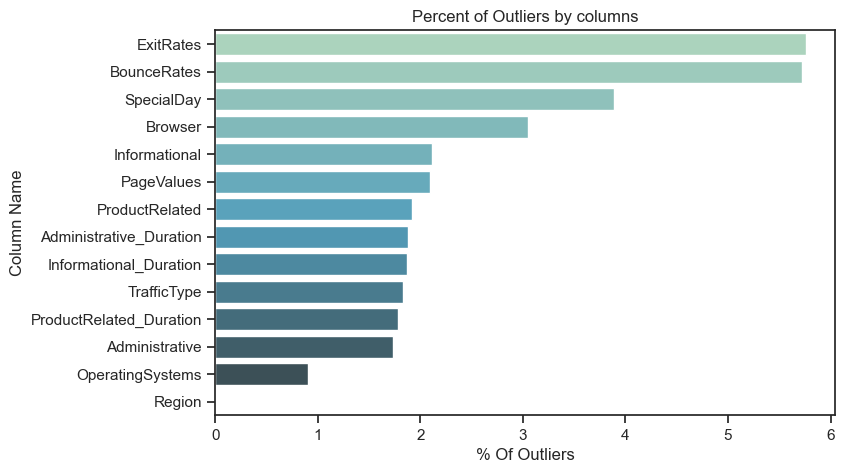

In [41]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'GnBu_d')
plt.title('Percent of Outliers by columns')
plt.ylabel('Column Name')
plt.show()

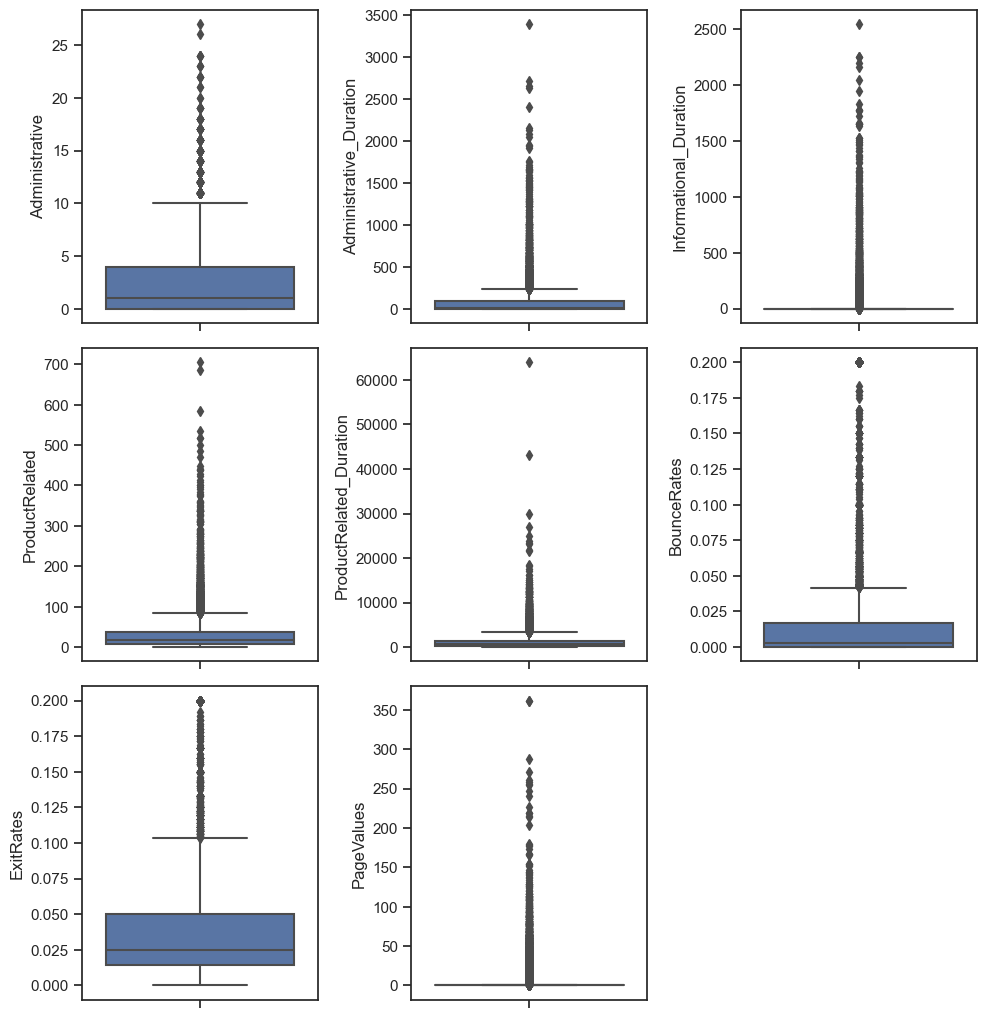

In [42]:
fig = plt.figure(figsize=(10,17))
for index,col in enumerate(lista_numeric_cont_features):
    plt.subplot(5,3,index+1)
    sns.boxplot(y=col, data=retail)
    fig.tight_layout(pad=1.0)

Se observa que tenemos una gran cantidad de outliers. PageValues e Informational_Duration no tienen ninguna distribución.
Un método robusto para el etiquetado de valores atípicos es el método IQR (rango intercuartílico) de detección de valores atípicos desarrollado por John Tukey, el pionero del análisis exploratorio de datos

Un gráfico de caja y bigote utiliza cuartiles (puntos que dividen los datos en cuatro grupos de igual tamaño) para trazar la forma de los datos. La caja representa los cuartiles primero y tercero, que son iguales a los percentiles 25 y 75. La línea dentro de la caja representa el segundo cuartil, que es la mediana. El rango intercuartílico, que da nombre a este método de detección de valores atípicos, es el rango entre el primero y el tercer cuartil (los bordes de la caja). Tukey consideró cualquier punto de datos que cayó fuera de 1,5 veces el IQR por debajo del primero - o 1,5 veces el IQR por encima del tercero - cuartil para estar fuera o lejos. En una trama clásica de caja y bigote, los 'bigotes' se extienden hasta el último punto de datos que no está fuera

In [43]:
numerical_features = ['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration','ProductRelated','Administrative'] # The columns you want to search for outliers in

for cols in numerical_features:
    Q1 = retail[cols].quantile(0.25)
    Q3 = retail[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (retail[cols] >= Q1 - 1.5 * IQR) & (retail[cols] <= Q3 + 1.5 *IQR)
    retail=retail.loc[filter]

In [44]:
retail.shape

(7884, 18)

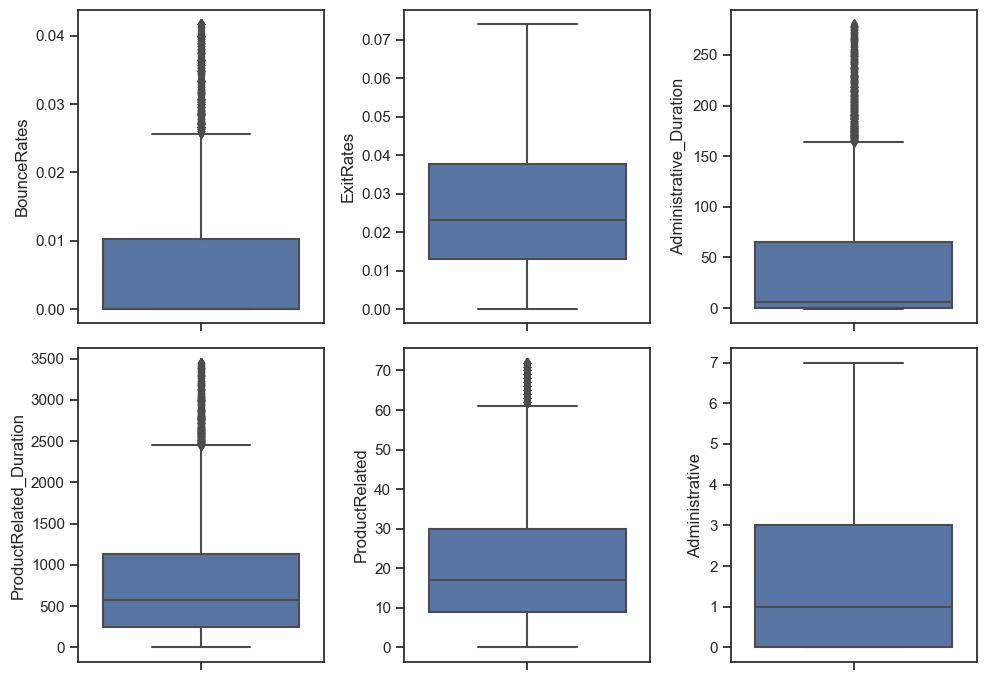

In [45]:
fig = plt.figure(figsize=(10,17))
for index,col in enumerate(numerical_features):
    plt.subplot(5,3,index+1)
    sns.boxplot(y=col, data=retail)
    fig.tight_layout(pad=1.0)

Como se aprecia, hemos eliminado un gran número de outliers.

# 3) Tratamiento de categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o utilizando un label encoder. Hay que justificar las operaciones que se realizan.

El primer enfoque es identificar los distintos valores existentes y sustituir cada uno de ellos por un número, enfoque denominado Label Encoding. Vamos a substituir en la columna 'Revenue' el valor False por 0 y el valor True por 1. De manera análoga, haremos lo mismo para la variable 'Weekend' que también es de tipo booleano. Por otro lado, los meses los pasaremos a variables dummies con el fin de que nuestro modelo sea lo más predictivo posible. También lo haremos con el tipo de visitante. De este modo, todas las variables independientes estarán en formato numérico, lo cual es muy importante.

In [46]:
le = LabelEncoder()
retail['Revenue'] = le.fit_transform(retail['Revenue'])
retail['Revenue'].value_counts()

0    6617
1    1267
Name: Revenue, dtype: int64

In [47]:
retail['Weekend'] = le.fit_transform(retail['Weekend'])
retail['Weekend'].value_counts()

0    5968
1    1916
Name: Weekend, dtype: int64

In [48]:
encoded_features=['Month','VisitorType']
label_encoder = LabelEncoder()
for col in encoded_features:
    retail[col] = label_encoder.fit_transform(retail[col])
    
retail.head()

Administrative  Administrative_Duration  Informational  \
4              0.0                      0.0            0.0   
5              0.0                      0.0            0.0   
9              0.0                      0.0            0.0   
10             0.0                      0.0            0.0   
11             0.0                      0.0            0.0   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
4                      0.0            10.0               627.500000   
5                      0.0            19.0               154.216667   
9                      0.0             3.0               738.000000   
10                     0.0             3.0               395.000000   
11                     0.0            16.0               407.750000   

    BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
4      0.020000   0.050000         0.0         0.0      2                 3   
5      0.015789   0.024561         0.0         0.0      2                 2   
9      0.000000   0.022222         0.0         0.4      2                 2   
10     0.000000   0.066667         0.0         0.0      2                 1   
11     0.018750   0.025833         0.0         0.4      2                 1   

    Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
4         3       1            4            2        1        0  
5         2       1            3            2        0        0  
9         4       1            2            2        0        0  
10        1       3            3            2        0        0  
11        1       4            3            2        0        0

In [49]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884 entries, 4 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           7884 non-null   float64
 1   Administrative_Duration  7884 non-null   float64
 2   Informational            7884 non-null   float64
 3   Informational_Duration   7884 non-null   float64
 4   ProductRelated           7884 non-null   float64
 5   ProductRelated_Duration  7884 non-null   float64
 6   BounceRates              7884 non-null   float64
 7   ExitRates                7884 non-null   float64
 8   PageValues               7884 non-null   float64
 9   SpecialDay               7884 non-null   float64
 10  Month                    7884 non-null   int32  
 11  OperatingSystems         7884 non-null   int64  
 12  Browser                  7884 non-null   int64  
 13  Region                   7884 non-null   int64  
 14  TrafficType            

# 4. Si existe alguna variable que se necesite borrar, habrá que borrara y justificarlo.

La selección de características es uno de los primeros e importantes pasos al realizar cualquier tarea de aprendizaje automático. Una característica en el caso de un conjunto de datos simplemente significa una columna. Cuando obtenemos cualquier conjunto de datos, no necesariamente cada columna (característica) tendrá un impacto en la variable de salida. Si agregamos estas características irrelevantes en el modelo, solo empeorará el modelo (Garbage In Garbage Out). Esto da lugar a la necesidad de hacer la selección de características.

Los métodos de selección de características reducen la dimensionalidad de los datos y evitan el problema de la maldición de la dimensionalidad.

In [50]:
X=retail.drop(['Revenue'],axis=1)
y=retail.Revenue

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [51]:
print(model.feature_importances_)

[0.04157517 0.04130858 0.02339805 0.02316335 0.05763599 0.06383841
 0.03989813 0.0653061  0.40780402 0.00748938 0.04656314 0.03101455
 0.03123102 0.0431504  0.04265778 0.01920797 0.01475796]


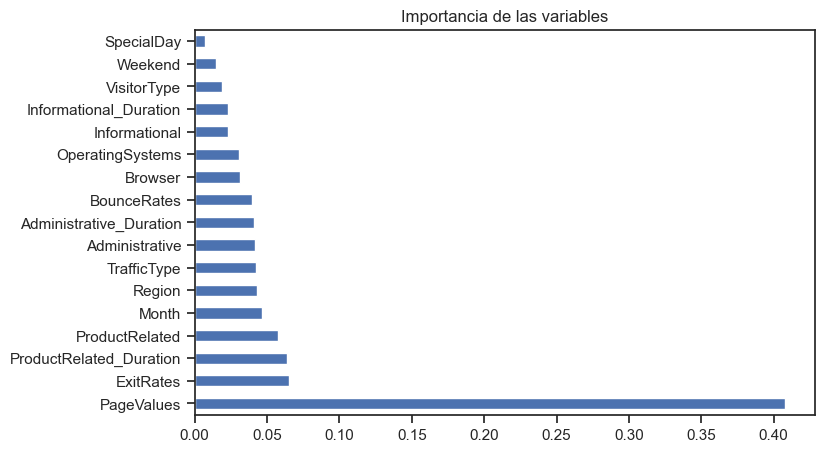

In [52]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.title('Importancia de las variables')
plt.show()

Siguiendo la gráfica anterior para la cual se muestra su relevancia en el conjunto de datos, estamos en condiciones de eliminar algunas columnas que no afectarán al diseño del modelo.

In [53]:
retail = retail.drop(['SpecialDay','Weekend','VisitorType'], axis=1)

In [54]:
retail.head()

Administrative  Administrative_Duration  Informational  \
4              0.0                      0.0            0.0   
5              0.0                      0.0            0.0   
9              0.0                      0.0            0.0   
10             0.0                      0.0            0.0   
11             0.0                      0.0            0.0   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
4                      0.0            10.0               627.500000   
5                      0.0            19.0               154.216667   
9                      0.0             3.0               738.000000   
10                     0.0             3.0               395.000000   
11                     0.0            16.0               407.750000   

    BounceRates  ExitRates  PageValues  Month  OperatingSystems  Browser  \
4      0.020000   0.050000         0.0      2                 3        3   
5      0.015789   0.024561         0.0      2                 2        2   
9      0.000000   0.022222         0.0      2                 2        4   
10     0.000000   0.066667         0.0      2                 1        1   
11     0.018750   0.025833         0.0      2                 1        1   

    Region  TrafficType  Revenue  
4        1            4        0  
5        1            3        0  
9        1            2        0  
10       3            3        0  
11       4            3        0

# 5. Estandariza los datos.

Para que funcionen mejor muchos algoritmos de Machine Learning usados en Data Science, hay que normalizar las variables de entrada al algoritmo. Normalizar significa, en este caso, comprimir o extender los valores de la variable para que estén en un rango definido. No existe un método ideal de normalización que funcione para todas las formas de variables. Es trabajo del Data Scientist conocer cómo se distribuyen los datos, saber si existen anomalías, comprobar rangos, etc. Con este conocimiento, se puede seleccionar la mejor técnica para no distorsionar los datos.

In [55]:
X=retail
y=retail.Revenue #vector

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [56]:
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

# 6. Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con CrossValidation y GridSearch.

* Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones lineales, etc.
* Utilizar un modelo de redes neuronales.
* Utilizar cualquier otro modelo de clasificación.


<hr>
Al determinar la métrica que utilizamos para nuestro modelo, primero debemos considerar el contexto de los errores de tipo I y tipo II para nuestro problema:

* Un error de tipo I (falso positivo) sería predecir que un cliente hará una compra, cuando en realidad no lo hacen.

* Un error de tipo II (falso negativo) sería predecir que un cliente no hará una compra, cuando en realidad lo hacen.

Además, debemos considerar el objetivo comercial de una empresa de comercio electrónico que podría estar utilizando este modelo. Asumimos que la empresa tendrá los siguientes objetivos:

* Maximizar los ingresos mediante el aumento de la tasa de conversión de compra

* Minimice la interrupción de la experiencia del cliente de los empujones dirigidos

Con base en esto, observamos que las métricas relevantes incluyen precisión y recuerdo. Para ser más específicos, queremos **maximizar el recuerdo**, manteniendo un umbral mínimo de precisión del 60% (umbral basado en los requisitos y la tolerancia del negocio).
<hr>

# Regresion Logística.

In [57]:
modelo1 = LogisticRegression()
parametros = {"C": [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06], 
              "class_weight":['balanced', None]}

In [58]:
modelo_gs = GridSearchCV(modelo1, param_grid=parametros,
                         cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05,
                               0.06],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [59]:
# imprimimos los mejores parámetros obtenidos
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.01, 'class_weight': 'balanced'} 
ROC AUC: 0.96


Un buen resultado se encuentra alrededor de 0.7 y 0.9, esto se considera Test bueno, tal como podemos ver nuestro resultado es bueno ya que se ha obtenido 0.96.

In [60]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

In [61]:
reg_log.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced')

In [62]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(y_test == 0)[0]]

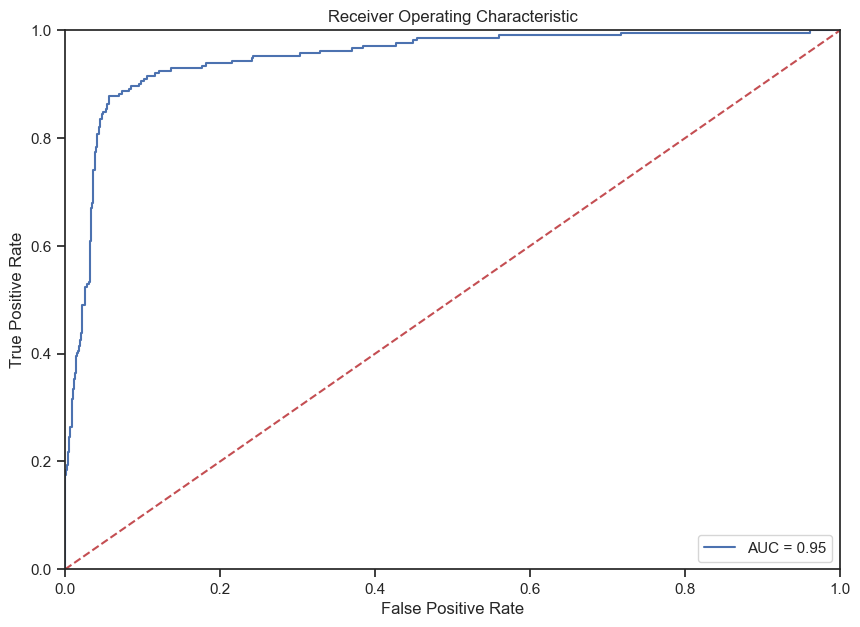

In [63]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

La curva ROC muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. En general, cuanto más cerca está la curva del punto (0,1), mejor es el modelo. Por lo tanto, nuestro modelo es muy bueno.

In [64]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [65]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(y_test, y_umbralizadas))
print("\nExactitud\t{}".format(round(metrics.accuracy_score(y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(y_test, y_umbralizadas),2))) 

Matriz de confusión
 [[927  44]
 [ 35 177]]

Exactitud	0.93
Sensitividad	0.83
Precisión	0.8


# Red neuronal

In [66]:
modelo2 = MLPClassifier()
parametros = {'solver': ['lbfgs'], 
              'max_iter': [100,200,300,500], # Iteraciones max en cada red
              'alpha': 10.0 ** -np.arange(1, 10), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(30, 35), # Nº de neuronas en cada capa
              'random_state':[0]}

In [67]:
modelo_gs2 = GridSearchCV(modelo2, param_grid=parametros, cv = 3, 
                         scoring='roc_auc', n_jobs=-1, verbose=10)
modelo_gs2.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [100, 200, 300, 500], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

In [73]:
# imprimimos los mejores parámetros obtenidos
print(modelo_gs2.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'alpha': 0.1, 'hidden_layer_sizes': 32, 'max_iter': 500, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.96


In [74]:
mejor2 = MLPClassifier(**modelo_gs2.best_params_, verbose=10)

In [76]:
mejor2.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=32, max_iter=500, random_state=0,
              solver='lbfgs', verbose=10)

In [78]:
y_test_pred_prob2 = mejor2.predict_proba(X_test) 
y_test_pred_prob_pos2 = y_test_pred_prob2[np.where(y_test == 1)[0]]
y_test_pred_prob_neg2 = y_test_pred_prob2[np.where(y_test == 0)[0]]

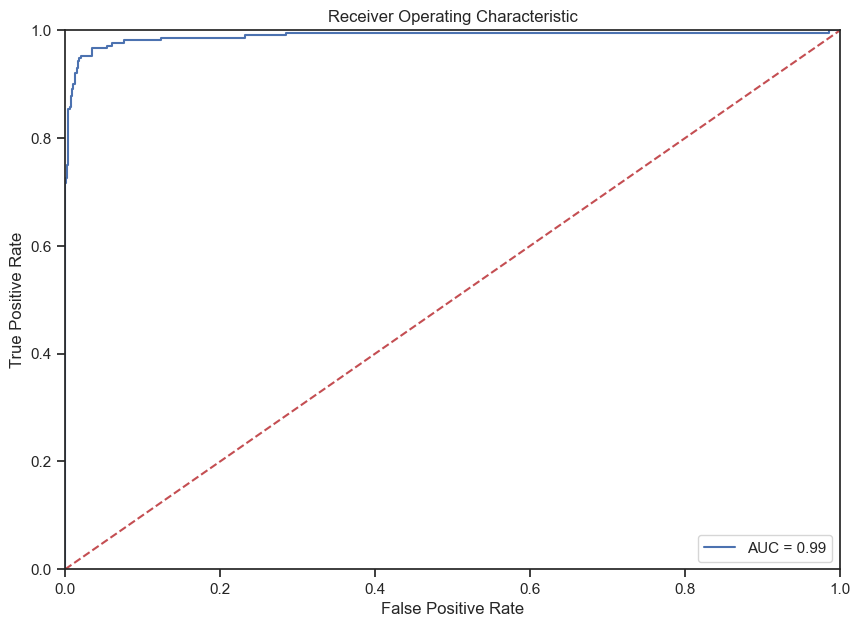

In [79]:
preds2 = y_test_pred_prob2[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds2)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
umbral2 = 0.3
Y_umbralizadas2 = 1*(y_test_pred_prob2[:, 1] > umbral2)

In [83]:
# Matriz de confusión

print(u"Matriz de confusión\n", metrics.confusion_matrix(y_test, Y_umbralizadas2))
print("\nExactitud\t{}".format(round(metrics.accuracy_score(y_test, Y_umbralizadas2),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(y_test, Y_umbralizadas2),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(y_test, Y_umbralizadas2),2))) 

Matriz de confusión
 [[952  19]
 [ 11 201]]

Exactitud	0.97
Sensitividad	0.95
Precisión	0.91


# Random Forest Classifier

In [68]:
rf_clf = RandomForestClassifier().fit(X_train, y_train)
rf_clf.score(X_train, y_train)

1.0

In [69]:
rf_y_test_pred = rf_clf.predict(X_test)

In [70]:
# Classification Report
print(classification_report(y_test, rf_y_test_pred, target_names=['No Revenue', 'Revenue']))

              precision    recall  f1-score   support

  No Revenue       1.00      1.00      1.00       971
     Revenue       1.00      1.00      1.00       212

    accuracy                           1.00      1183
   macro avg       1.00      1.00      1.00      1183
weighted avg       1.00      1.00      1.00      1183



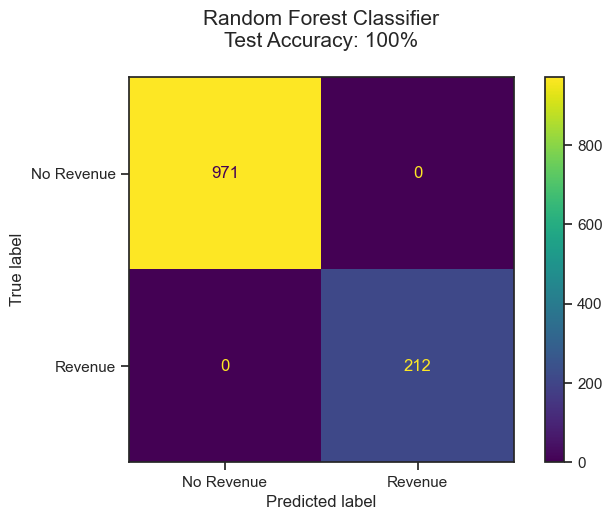

In [71]:
# Plot the confusion matrix
rf_test_acc = round(accuracy_score(y_test, rf_y_test_pred) * 100)
plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=['No Revenue', 'Revenue'])
plt.title(f'Random Forest Classifier\nTest Accuracy: {rf_test_acc}%\n', size=15)
plt.grid(False)

El modelo que mejor nos proporciona una predicción es el de Random Forest.